In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, scale
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data_loc = "Data Set/UNSW_NB15.csv"
df = pd.read_csv(data_loc, nrows=600) # lees eerste x rijen van dataset
#df = pd.get_dummies(df,columns=["proto","state","service"]) # maak dummies (nummers) van categorische variabelen

le = LabelEncoder()
df['proto'] = le.fit_transform(df['proto']) # encode categorische variabelen naar nummers
df['state'] = le.fit_transform(df['state'])
df['service'] = le.fit_transform(df['service'])
df['attack_cat'] = le.fit_transform(df['attack_cat'])


x = (df - df.mean())/df.std() # standaardiseer dataset (mean 0, variance 1)
x.drop(columns=['attack_cat', 'label'], inplace=True) # drop kolommen die niet gebruikt worden
#x = scale(df)
y = df['attack_cat'] # target variabele


# split de dataset in train/test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3)
print(X_train)



ModuleNotFoundError: No module named 'sklearn'

# Zonder optimalisatie van hyperparameters is de standaard accuracy 0.70 aka 70%

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=900, activation='logistic', solver='lbfgs').fit(X_train, y_train)
clf.score(X_test, y_test)

0.7

In [ ]:
class DNA:
    def __init__(self, value: list) -> None:
        self.value = value

class GeneticAlgo:
    # hyperparameters
    activation = ['identity', 'logistic', 'tanh', 'relu']
    solver = ['lbfgs', 'sgd', 'adam']
    learning_rate = ['constant', 'invscaling', 'adaptive']
    boolean = [True, False]
    hidden_layer_sizes_range = [1, 3000]
    alpha_range = [0.00001, 0.9]
    batch_size_range = [5, 200]
    learning_rate_init_range = [0.0001, 0.1]
    max_iter_range = [100, 2000]
    random_state_range = [1, 100]
    tol_range = [0.00001, 0.1]
    power_t_range = [0.1, 0.9]
    momentum_range = [0.1, 0.9]
    epsilon_range = [0.0000001, 0.001]
    n_iter_no_change_range = [1, 100]
    max_fun_range = [1000, 20000]

    def __init__(self, n_pop: int, max_len: int) -> None:
        self.n_pop = n_pop
        self.max_len = max_len
        self.agents = []
    
    # maak populatie
    def create_population(self):
        self.agents = [DNA([self.geneCreateRandom(i) for i in range(self.max_len)]) for _ in range(self.n_pop)]
    # maak random genen
    def geneCreateRandom(self, i):
        match i:
            case 0:
                return np.random.randint(self.hidden_layer_sizes_range[0], self.hidden_layer_sizes_range[1])
            case 1:
                return self.activation[np.random.randint(0, 4)]
            case 2:
                return self.solver[np.random.randint(0, 3)]
            case 3:
                return np.random.uniform(self.alpha_range[0], self.alpha_range[1])
            case 4:
                return np.random.randint(self.batch_size_range[0], self.batch_size_range[1])
            case 5:
                return self.learning_rate[np.random.randint(0, 3)]
            case 6:
                return np.random.uniform(self.learning_rate_init_range[0], self.learning_rate_init_range[1])
            case 7:
                return np.random.uniform(self.power_t_range[0], self.power_t_range[1])
            case 8:
                return np.random.randint(self.max_iter_range[0], self.max_iter_range[1])
            case 9:
                return self.boolean[np.random.randint(0, 2)]
            case 10:
                return np.random.randint(self.random_state_range[0], self.random_state_range[1])
            case 11:
                return np.random.uniform(self.tol_range[0], self.tol_range[1])
            case 12:
                return np.random.uniform(self.momentum_range[0], self.momentum_range[1])
            case 13:
                return self.boolean[np.random.randint(0, 2)]
            case 14:
                return np.random.uniform(self.epsilon_range[0], self.epsilon_range[1])
            case 15:
                return np.random.randint(self.n_iter_no_change_range[0], self.n_iter_no_change_range[1])
            case 16:
                return np.random.randint(self.max_fun_range[0], self.max_fun_range[1])
    # evalueer agents op fitness        
    def evaluate(self):
        def compute_fitness(agent):
            clf = MLPClassifier(hidden_layer_sizes=agent[0], activation=agent[1], solver=agent[2], alpha=agent[3], batch_size=agent[4], learning_rate=agent[5], learning_rate_init=agent[6], power_t=agent[7], max_iter=agent[8], shuffle=agent[9], random_state=agent[10], tol=agent[11], momentum=agent[12], nesterovs_momentum=agent[13], epsilon=agent[14], n_iter_no_change=agent[15], max_fun=agent[16]).fit(X_train, y_train)
            return clf.score(X_test, y_test)
        
        fitness_scores = [compute_fitness(a.value) for a in self.agents]
        # sorteer agents op fitness score
        sorted_agents = sorted(zip(fitness_scores, self.agents), reverse=True, key=lambda x: x[0])
        return [a for _, a in sorted_agents], sorted_agents[0]
    # selecteer agents voor crossover met elitism, doe crossover en mutatie
    def dna_crossover(self, dna, mutation_rate):
        new_generation = GeneticAlgo(self.n_pop, self.max_len)
        #elitism (beste 2 agents gaan door)
        new_generation.agents.append(dna[0]) 
        new_generation.agents.append(dna[1])

        for i in range(0, self.n_pop-2, 2): # 2 af door elitism
            crossover_point = np.random.randint(0, self.max_len)
            new_dna1 = DNA(dna[i].value[:crossover_point] + dna[i+1].value[crossover_point:])
            new_dna2 = DNA(dna[i+1].value[:crossover_point] + dna[i].value[crossover_point:])

            # kleine kan op mutatie
            if np.random.random() < mutation_rate:
                mutation_point = np.random.randint(0, self.max_len)
                new_dna1.value[mutation_point] = self.geneCreateRandom(mutation_point)
            if np.random.random() < mutation_rate:
                mutation_point = np.random.randint(0, self.max_len)
                new_dna2.value[mutation_point] = self.geneCreateRandom(mutation_point)
            new_generation.agents.append(new_dna1)
            new_generation.agents.append(new_dna2)
        
        return new_generation



In [ ]:
mutation_rate = 0.5
algo = GeneticAlgo(10, 17)
algo.create_population()
target = 0.99
no_change_time = 200

temp_score = 0
no_change = no_change_time
data = [[], []]

for i in range(1200):
    sorted_dna, best_fitness = algo.evaluate()
    print(f'iter: {i}, best fitness: {best_fitness[0]}, value: "{sorted_dna[0].value}"')
    data[0].append(i)
    data[1].append(best_fitness[0])
    # stop als target bereikt is
    if best_fitness[0] >= target: 
        print("target reached")
        break
    
    if temp_score == best_fitness[0]: no_change -= 1
    else: no_change = no_change_time
    # stop als er geen verandering is in fitness na x iteraties
    if no_change == 0: 
        print("no change")
        break

    new_algo = algo.dna_crossover(sorted_dna, mutation_rate)
    algo = new_algo
    
# beste model
clf = MLPClassifier(hidden_layer_sizes=sorted_dna[0].value[0], activation=sorted_dna[0].value[1], solver=sorted_dna[0].value[2], alpha=sorted_dna[0].value[3], batch_size=sorted_dna[0].value[4], learning_rate=sorted_dna[0].value[5], learning_rate_init=sorted_dna[0].value[6], power_t=sorted_dna[0].value[7], max_iter=sorted_dna[0].value[8], shuffle=sorted_dna[0].value[9], random_state=sorted_dna[0].value[10], tol=sorted_dna[0].value[11], momentum=sorted_dna[0].value[12], nesterovs_momentum=sorted_dna[0].value[13], epsilon=sorted_dna[0].value[14], n_iter_no_change=sorted_dna[0].value[15], max_fun=sorted_dna[0].value[16]).fit(X_train, y_train)
print(clf.score(X_test, y_test))





iter: 0, best fitness: 0.7055555555555556, value: "[420, 'relu', 'adam', 0.6227359573004119, 25, 'invscaling', 0.050047040629091384, 0.5000070944210656, 1774, False, 28, 0.034134428288017715, 0.5982163136891122, False, 0.0004402756377463501, 6, 3097]"
iter: 1, best fitness: 0.7055555555555556, value: "[420, 'relu', 'adam', 0.6227359573004119, 25, 'invscaling', 0.050047040629091384, 0.5000070944210656, 1774, False, 28, 0.034134428288017715, 0.5982163136891122, False, 0.0004402756377463501, 6, 3097]"
iter: 2, best fitness: 0.7444444444444445, value: "[927, 'identity', 'adam', 0.2832249543062091, 71, 'constant', 0.07471332083768198, 0.4629124957421905, 1365, False, 27, 0.07884239493699413, 0.8764673778287795, True, 0.0005976933794876498, 36, 18472]"
iter: 3, best fitness: 0.7444444444444445, value: "[927, 'identity', 'adam', 0.2832249543062091, 71, 'constant', 0.07471332083768198, 0.4629124957421905, 1365, False, 27, 0.07884239493699413, 0.8764673778287795, True, 0.0005976933794876498, 36

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

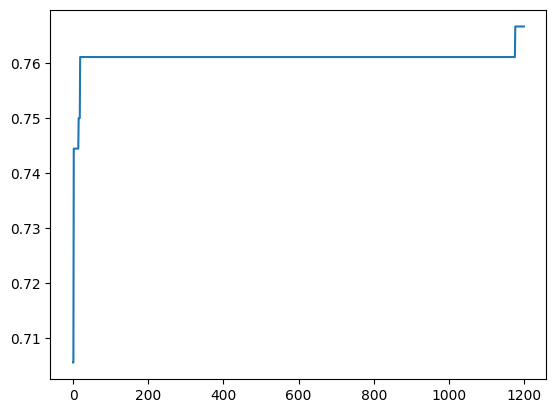

In [ ]:
print(data)
plt.plot(data[0], data[1])
plt.show()